In [42]:
import numpy as np
from datetime import datetime

In [2]:
from skyfield.sgp4lib import EarthSatellite

line1 = "1 44369U 19037E   19336.85128827  .00002948  00000-0  80338-4 0  9998"
line2 = "2 44369  45.0161 138.5612 0013131 104.2716 255.9637 15.40122637 24094"

acrux1 = EarthSatellite(line1, line2, name="ACRUX1")

In [3]:
from skyfield.api import load

planets = load('de430t.bsp')
ts = load.timescale()
sun = planets['sun']

In [4]:
packetdata = np.genfromtxt("observation.csv", dtype=float, delimiter=',', names=True) 

In [5]:
from skyfield.api import utc

def numpytime_to_skyfieldtime(t):
    return ts.utc(t.item().year, t.item().month, t.item().day, t.item().hour, t.item().minute, t.item().second)

In [49]:
power_Xpos = packetdata["Xposv"] * packetdata["Xposi"]
power_Xneg = packetdata["Xnegv"] * packetdata["Xnegi"]
power_Ypos = packetdata["Yposv"] * packetdata["Yposi"]
power_Yneg = packetdata["Ynegv"] * packetdata["Ynegi"]
power_Zneg = packetdata["Znegv"] * packetdata["Znegi"]
t = packetdata['UnixTimestamp']

In [52]:
t-t[0]

array([   0.,   10.,   21.,   31.,   42.,   53.,   63.,   74.,   84.,
         95.,  106.,  116.,  127.,  137.,  148.,  159.,  169.,  190.,
        201.,  212.,  222.,  233.,  243.,  265.,  275.,  286.,  296.,
        307.,  317.,  328.,  339.,  349.,  360.,  381., 2369., 2379.,
       2390., 2400., 2411., 2422., 2432., 2443., 2453., 2464., 2474.,
       2485., 2495., 2506., 2517., 2569.])

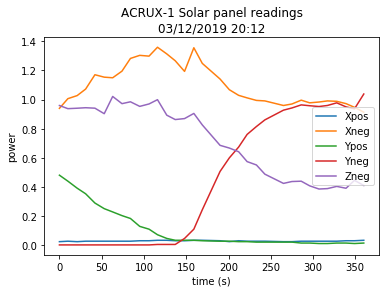

In [87]:
import matplotlib.pyplot as plt
plt.plot(t[:33]-t[0], power_Xpos[:33])
plt.plot(t[:33]-t[0], power_Xneg[:33])
plt.plot(t[:33]-t[0], power_Ypos[:33])
plt.plot(t[:33]-t[0], power_Yneg[:33])
plt.plot(t[:33]-t[0], power_Zneg[:33])
plt.legend(["Xpos", "Xneg", "Ypos", "Yneg", "Zneg"])
plt.xlabel("time (s)")
plt.ylabel("power")
plt.title(f"ACRUX-1 Solar panel readings\n"+datetime.fromtimestamp(t[0]).strftime("%d/%m/%Y %H:%M"))
plt.savefig("fig1.png")
None

'2019'

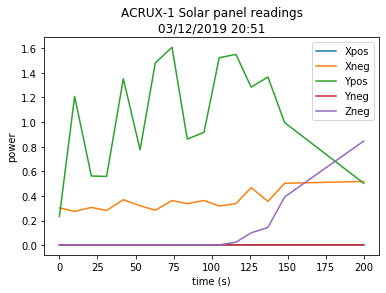

In [89]:
import matplotlib.pyplot as plt
plt.plot(t[34:]-t[34], power_Xpos[34:])
plt.plot(t[34:]-t[34], power_Xneg[34:])
plt.plot(t[34:]-t[34], power_Ypos[34:])
plt.plot(t[34:]-t[34], power_Yneg[34:])
plt.plot(t[34:]-t[34], power_Zneg[34:])
plt.legend(["Xpos", "Xneg", "Ypos", "Yneg", "Zneg"])
plt.xlabel("time (s)")
plt.ylabel("power")
plt.title(f"ACRUX-1 Solar panel readings\n"+datetime.fromtimestamp(t[34]).strftime("%d/%m/%Y %H:%M"))
plt.savefig("fig2.png")
None

In [12]:
power_all = np.zeros((5, power_Xpos.shape[0]))
power_all[0,:] = power_Xpos
power_all[1,:] = power_Xneg
power_all[2,:] = power_Ypos
power_all[3,:] = power_Yneg
power_all[4,:] = power_Zneg

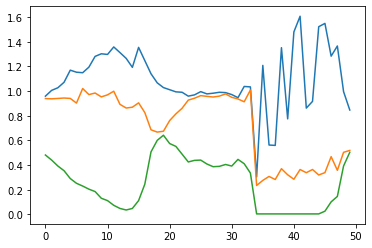

In [13]:
plt.plot(np.sort(power_all, axis=0)[-1,:])
plt.plot(np.sort(power_all, axis=0)[-2,:])
plt.plot(np.sort(power_all, axis=0)[-3,:])
None

In [91]:
total_power = np.sqrt(power_Xneg**2 + power_Zneg**2 + power_Ypos**2)

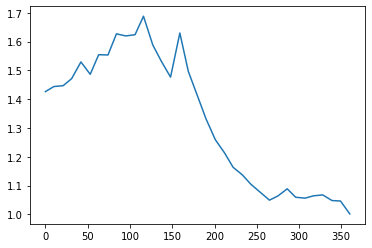

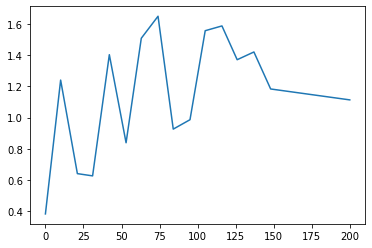

In [96]:
plt.plot(t[:33]-t[0], total_power[:33])
plt.figure()
plt.plot(t[34:]-t[34], total_power[34:])
None

In [145]:
cosXneg = power_Xneg / total_power
cosYpos = power_Ypos / total_power
cosYneg = power_Yneg / total_power
cosZneg = power_Zneg / total_power

In [98]:
a = np.arccos(cosXneg)
b = np.arccos(cosYpos)
c = np.arccos(cosZneg)

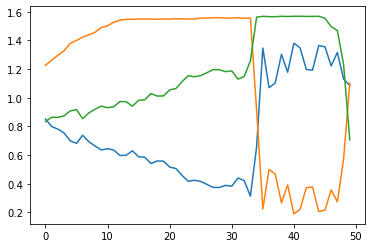

In [99]:
plt.plot(a)
plt.plot(b)
plt.plot(c)
None

In [19]:
t = packetdata["UnixTimestamp"].astype("datetime64[s]")[0]
t = numpytime_to_skyfieldtime(t)
acrux1.at(t)
sun.at(t)

<Barycentric BCRS position and velocity at date t center=0 target=10>

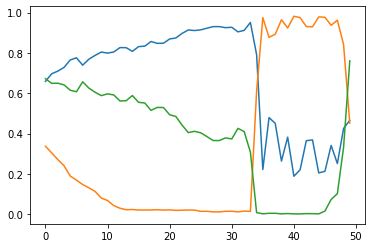

In [20]:
plt.plot(cosXneg)
plt.plot(cosYpos)
plt.plot(cosZneg)

In [154]:
from vpython import *
import numpy as np
c = canvas()
b = box()
x = smooth(np.diff(cosXneg))
y = smooth(np.diff(cosYpos))
z = smooth(np.diff(cosZneg))

for i in range(10000):
    rate(1/10)
    b.rotate(x[i%15], axis=vector(1,0,0))
    b.rotate(y[i%15], axis=vector(0,1,0))
    b.rotate(z[i%15], axis=vector(0,0,1))
    scene.camera.pos = vector(0,0,2)

<IPython.core.display.Javascript object>

ValueError: rate value must be greater than or equal to 1

In [153]:
from vpython import *
import numpy as np
c = canvas()
b = box()
x = smooth(np.diff(cosXneg))
y = smooth(np.diff(cosYneg))
z = smooth(np.diff(cosZneg))

for i in range(10000):
    rate(10)
    b.rotate(x[i%15+34], axis=vector(1,0,0))
    b.rotate(y[i%15+34], axis=vector(0,1,0))
    b.rotate(z[i%15+34], axis=vector(0,0,1))
    scene.camera.pos = vector(0,0,2)

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [147]:
15+19

34

In [130]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [138]:
np.diff(t)

array([  10.,   11.,   10.,   11.,   11.,   10.,   11.,   10.,   11.,
         11.,   10.,   11.,   10.,   11.,   11.,   10.,   21.,   11.,
         11.,   10.,   11.,   10.,   22.,   10.,   11.,   10.,   11.,
         10.,   11.,   11.,   10.,   11.,   21., 1988.,   10.,   11.,
         10.,   11.,   11.,   10.,   11.,   10.,   11.,   10.,   11.,
         10.,   11.,   11.,   52.])